# Identifying the Best Classifier


###### Problem
We have to find out the best classifier to predict whether a loan case will be paidoff or not.

###### The Dataset
This dataset is about past loans of 346 customers whose loan are already paid off or defaulted.  

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


###### Import Libraries

In [38]:
import itertools
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing

%matplotlib inline

In [39]:
# random seen for similar results in each run
np.random.seed(7) 

###### Load Dataset

In [40]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
df = pd.read_csv(path) 

In [41]:
df.head() 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


###### Preprocessing

In [42]:
# Date-Time Format
df['due_date'] = pd.to_datetime(df['due_date']) 
df['effective_date'] = pd.to_datetime(df['effective_date']) 
df.head(4) 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female


In [43]:
# Day of Week
df['dayofweek'] = df['effective_date'].dt.dayofweek
df.head(4) 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4


In [44]:
# Binarization to set a threshold value less than day 4
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3) else 0) 
df.head(4) 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1


In [45]:
# Groupby Gender
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True) 

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [46]:
# Convert Male to 0 and Female to 1
df['Gender'].replace(to_replace = ['male','female'], value=[0,1], inplace=True)
df.head(4) 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1


In [47]:
# Group by Education
df.groupby(['education'])['loan_status'].value_counts(normalize=True) 

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [55]:
df['education'].value_counts() 

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [56]:
# One Hot Encoding / Convert variables into binary data
# Drop Master or Above from Education as it has only 2 entry

Feature = df[['Principal', 'terms', 'age', 'Gender', 'weekend', 'dayofweek']] 
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1) 
Feature.drop(['Master or Above'], axis=1, inplace=True) 
Feature.head() 

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


In [57]:
# Feature Selection
X = Feature
Y = df['loan_status'].values 

In [58]:
# Normalization
X = preprocessing.StandardScaler().fit(X).transform(X) 

---
---

###### Classifiers
We will use following algorihtms to build our models:
- k-Nearest Neighbor
- Decision Tree
- Support Vector Machine
- Logistic Regression

### K Nearest Neighbor (KNN)

In [15]:
# Split dataset into Train and Test

from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=4) 

trainX.shape, trainY.shape, testX.shape, testY.shape 

((276, 9), (276,), (70, 9), (70,))

In [16]:
from sklearn.neighbors import KNeighborsClassifier 

In [17]:
# Modelling

k = 3

kNN = KNeighborsClassifier(n_neighbors=k).fit(trainX, trainY) 
predY = kNN.predict(testX) 

In [18]:
# best k

Ks = 15

mean_acc = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1))
ConfustionMx=[]; 

for n in range (1, Ks):
    kNN = KNeighborsClassifier(n_neighbors=n).fit(trainX, trainY) 
    predY = kNN.predict(testX) 
    
    mean_acc[n-1]=np.mean(predY == testY);
    std_acc[n-1]=np.std(predY == testY)/np.sqrt(predY.shape[0]) 

In [19]:
# Best Accuracy and best k 
print('Best Accuracy: ', mean_acc.max()) 
print('Best k: ', mean_acc.argmax()+1) 

Best Accuracy:  0.7285714285714285
Best k:  5


In [20]:
# Modelling Again with k=5

k = 5
kNN = KNeighborsClassifier(n_neighbors=k).fit(X,Y)  

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
# Modelling 
Tree = DecisionTreeClassifier(max_depth=4).fit(X, Y) 

### Support Vector Machine (SVM)

In [23]:
from sklearn import svm

In [24]:
# Modelling
SVM = svm.SVC().fit(X,Y)  

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, Y) 

# LR = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto').fit(trainX, trainY) 
# LR = LogisticRegression(random_state=0, solver='newton-cg').fit(trainX, trainY) 

---
---
---

###### Model Evaluation

In [27]:
# Downloading test set

path2 = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
df2 = pd.read_csv(path2) 

In [28]:
df2.shape

(54, 10)

In [29]:
# pre-processing the test set

df2['due_date'] = pd.to_datetime(df2['due_date']) 
df2['effective_date'] = pd.to_datetime(df2['effective_date'])  
df2['dayofweek'] = df2['effective_date'].dt.dayofweek

df2['weekend'] = df2['dayofweek'].apply(lambda x: 1 if (x>3) else 0) 

df2['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True) 

Feature = df2[['Principal', 'terms', 'age', 'Gender', 'weekend', 'dayofweek']] 
Feature = pd.concat([Feature, pd.get_dummies(df2['education'])], axis=1) 
Feature.drop(['Master or Above'], axis=1, inplace=True)

testX = Feature
testX = preprocessing.StandardScaler().fit(testX).transform(testX) 
testY = df2['loan_status'].values 

###### Accuracy Metrics
We will use the following metrics to findout the accuracy of each classifier:
   
- **F1 Score:** Higher the F1 score higher the accuracy of the classifier.  
- **Jaccard Index:** Higher the Jaccard score higher the accuracy of the classifier.  
- **Log-Loss:** Higher the accuracy Lower the log loss score.

In [30]:
# import Accuracy Metrics

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [31]:
knn_pred = kNN.predict(testX)
print("KNN Jaccard index: %.2f" % jaccard_score(testY, knn_pred, pos_label='PAIDOFF'))
print("KNN F1-score: %.2f" % f1_score(testY, knn_pred, average='weighted')) 

KNN Jaccard index: 0.67
KNN F1-score: 0.70


In [36]:
tree_pred = Tree.predict(testX) 
print("Tree Jaccard index: %.2f" % jaccard_score(testY, tree_pred, pos_label='PAIDOFF'))
print("Tree F1-score: %.2f" % f1_score(testY, tree_pred, average='weighted'))  

Tree Jaccard index: 0.76
Tree F1-score: 0.73


In [33]:
SVM_pred = SVM.predict(testX)
print("Tree Jaccard index: %.2f" % jaccard_score(testY, SVM_pred, pos_label='PAIDOFF'))
print("Tree F1-score: %.2f" % f1_score(testY, SVM_pred, average='weighted')) 

Tree Jaccard index: 0.72
Tree F1-score: 0.62


In [34]:
LR_pred = LR.predict(testX)
LR_pred_prob = LR.predict_proba(testX)
print("LR Jaccard index: %.2f" % jaccard_score(testY, LR_pred, pos_label='PAIDOFF'))
print("LR F1-score: %.2f" % f1_score(testY, LR_pred, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(testY, LR_pred_prob)) 

LR Jaccard index: 0.77
LR F1-score: 0.71
LR LogLoss: 0.47


###### Report  
  
  --
      
      
| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.67    | 0.70     | NA      |
| Decision Tree      | 0.76    | 0.73     | NA      |
| SVM                | 0.72    | 0.62     | NA      |
| LogisticRegression | 0.77    | 0.71     | 0.47    |


In [35]:
print('kNN Accuracy:', (0.67+0.70)/2)
print('Decision Tree Accuracy:', (0.76+0.73)/2) 
print('SVM Accuracy:', (0.72+0.62)/2)
print('Logistic Regression Accuracy:', ((0.77+0.71)+(1-0.47))/3) 

kNN Accuracy: 0.685
Decision Tree Accuracy: 0.745
SVM Accuracy: 0.6699999999999999
Logistic Regression Accuracy: 0.6699999999999999


##### From the above accuracy scoring results we can say that **Decision Tree Model** is the best classifier for this dataset. 

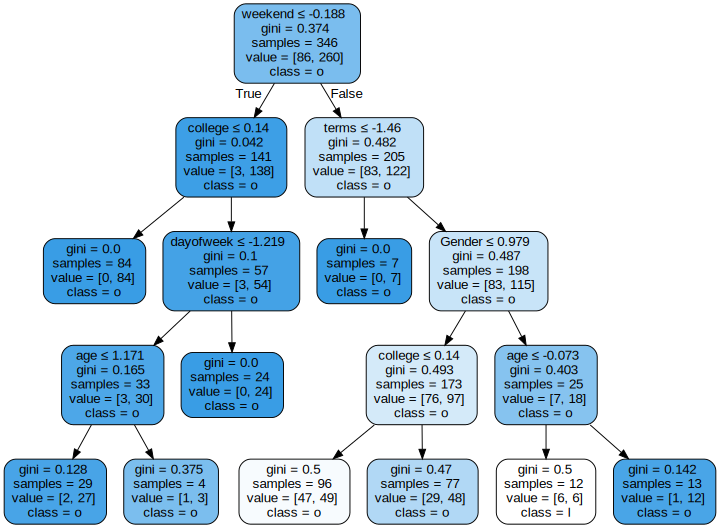

In [37]:
# Dicision Tree Visualization

from sklearn import tree

import graphviz 
import pydotplus

dot_data = tree.export_graphviz(Tree, out_file=None, 
                     feature_names=['Principal',
                                    'terms','age',
                                    'Gender',
                                    'weekend',
                                    'dayofweek',
                                    'Bechalor',
                                    'High School or Below',
                                    'college'],          
                     class_names='loan_status',  
                     filled=True, rounded=True,
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"10,12!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph 